In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re, string
import nltk
from nltk.tokenize import word_tokenize
# from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [107]:
nltk.download()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHASHWAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHASHWAT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHASHWAT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHASHWAT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SHASHWAT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [108]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [109]:
df = pd.read_excel("../Scrapper_New/Data_Files/Final/CrimevsNonCrime.xlsx")
df_Y = ((pd.Categorical(df.Label).codes).astype(int))
df.head(5)

,Title,Label
0,"Minor raped by cop in Jharkhand's Hazaribagh, ...",Crime
1,'Saw my brother getting killed': Bhilwara vict...,Crime
2,"Delhi Police arrests burglar, recovers huge qu...",Crime
3,Pregnant woman raped by hospital staff in UP’s...,Crime
4,"Muzaffarpur: 15-year-old girl thrashed, gang-r...",Crime


<AxesSubplot:>

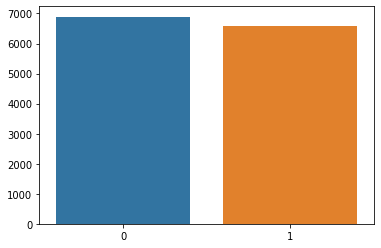

In [111]:
x = np.unique(Y_train, return_counts=True)
sns.barplot(x=x[0],y=x[1])

In [112]:
word_count = X_train.apply(lambda x: len(str(x).split()))
word_count = word_count.values.reshape(-1,1)
X_train = X_train.values.reshape(-1,1)
X_train = np.append(X_train,word_count,1)
# print(np.shape(X_train))
# print(word_count[Y_train==1].mean()) 
# print(word_count[Y_train==0].mean())

(13491, 2)


12.72779630190967
11.133613811112722


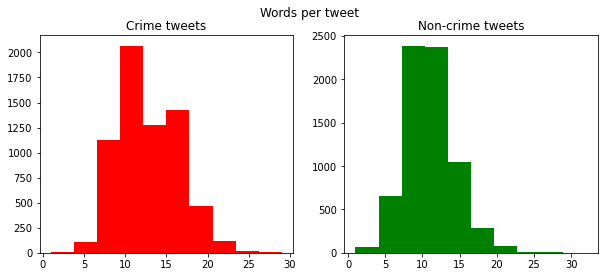

In [113]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=word_count[Y_train==1]
print(np.average(train_words))
ax1.hist(train_words,color='red')
ax1.set_title('Crime tweets')
train_words=word_count[Y_train==0]
print(np.average(train_words))
ax2.hist(train_words,color='green')
ax2.set_title('Non-crime tweets')
fig.suptitle('Words per tweet')
plt.show()

In [114]:
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text    

In [115]:
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [116]:
wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [117]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_X_train = pd.DataFrame(X_train, columns = ['Title','Word_Count'])
df_X_train['clean_text'] = df_X_train['Title'].apply(lambda x: finalpreprocess(x))
df_X_train.head()
# np.apply_along_axis(finalpreprocess, 0, X_train)

,Title,Word_Count,clean_text
0,Indian users spend over 5 hours daily on thei...,11,indian user spend hour daily smartphones ericsson
1,India is no country for women. Could the pande...,12,india country woman could pandemic help change
2,Indian PC market surges to 3.1M units in Q1 20...,11,indian pc market surge unit q idc
3,Maharashtra: Baby girl found dead in Latur river,8,maharashtra baby girl find dead latur river
4,New air strike on pro-Iran convoy in Iraq ahea...,14,new air strike pro iran convoy iraq ahead gen ...


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Title'], df_Y, test_size=0.2, random_state=42)